In [11]:
%reset
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import load_boston
from sklearn import preprocessing
import seaborn as sns
from numpy import dot
np.random.seed(678)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
boston = load_boston()
target = boston.target
boston = pd.DataFrame(boston.data,columns=boston.feature_names)
boston['Target'] = target
print('\n------Info--------')
print(boston.info())
print('\n------Describe--------')
print(boston.describe())
print('\n------head--------')
print(boston.head())


------Info--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None

------Describe--------
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000   

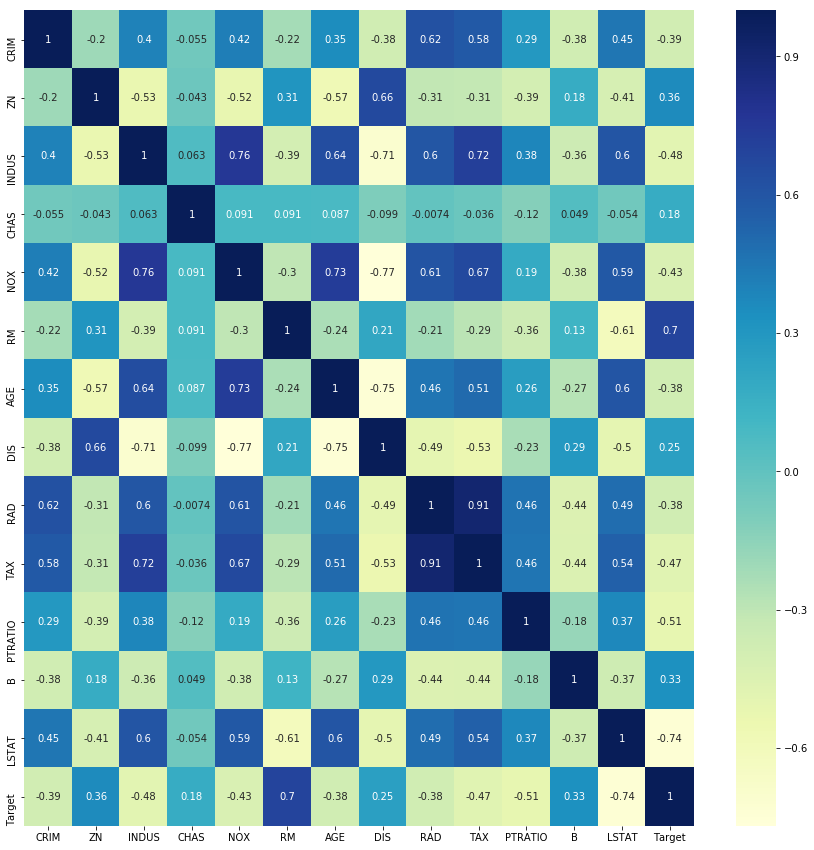

In [13]:
plt.figure(figsize=(15, 15))
sns.heatmap(boston.corr(),annot=True,cmap="YlGnBu")

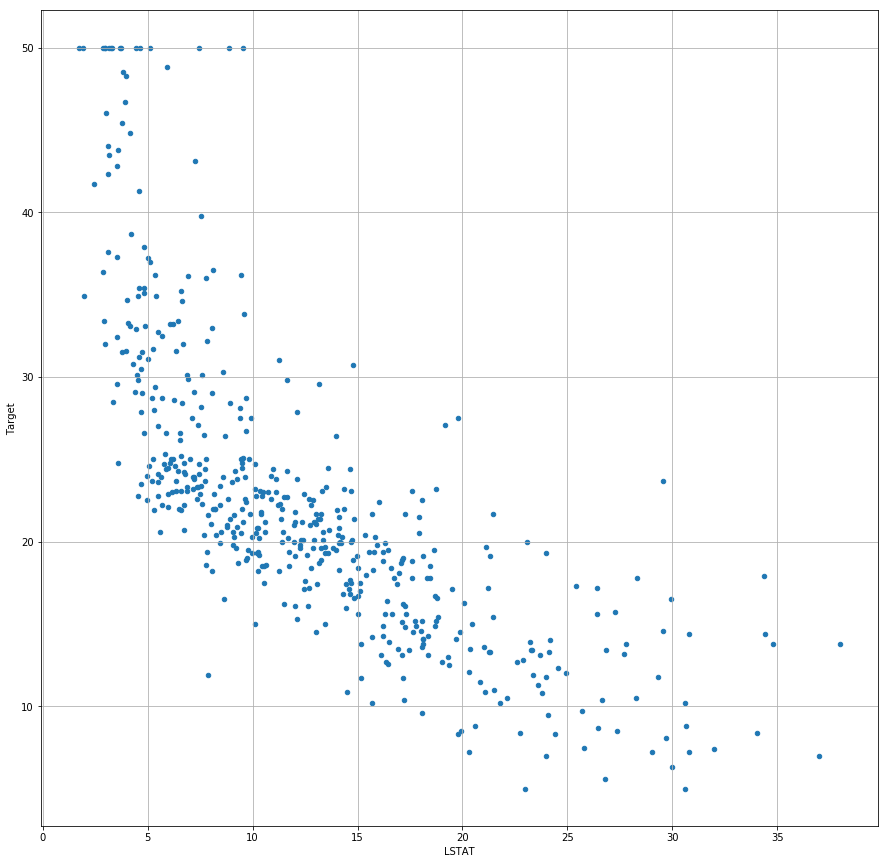

In [14]:
boston.plot.scatter(x='LSTAT',y='Target',figsize=(15,15),grid=True)

In [28]:
# create the first data
data_1 = boston.values

w_1_1 = data_1.dot(data_1.T)
e_value_1_1,e_vector_1_1 = np.linalg.eig(w_1_1)
e_value_1_1 = e_value_1_1.real
e_vector_1_1 = e_vector_1_1.real

w_1_2 = data_1.T.dot(data_1)
e_value_1_2,e_vector_1_2 = np.linalg.eig(w_1_2)
e_value_1_2 = e_value_1_2.real
e_vector_1_2 = e_vector_1_2.real

print("Original Data Shape: ", data_1.shape)
print('dot(A,A.T) Eigen Value: ',e_value_1_1.shape)
print('dot(A,A.T) Eigen Vector: ',e_vector_1_1.shape)
print('dot(A.T,A) Eigen Value: ',e_value_1_2.shape)
print('dot(A.T,A) Eigen Vector: ',e_vector_1_2.shape)

Original Data Shape:  (506, 14)
dot(A,A.T) Eigen Value:  (506,)
dot(A,A.T) Eigen Vector:  (506, 506)
dot(A.T,A) Eigen Value:  (14,)
dot(A.T,A) Eigen Vector:  (14, 14)


In [29]:
# Sort the eigen vector via the eigen value ranks
idx_1_1 = e_value_1_1.argsort()[::-1]   
e_value_1_1 = e_value_1_1[idx_1_1]
e_vector_1_1 = e_vector_1_1[:,idx_1_1]

idx_1_2 = e_value_1_2.argsort()[::-1]   
e_value_1_2 = e_value_1_2[idx_1_2]
e_vector_1_2 = e_vector_1_2[:,idx_1_2]

In [30]:
# Compute the Singular Value Matrix
rows_1_1 = np.nonzero(e_value_1_1)
rows_1_2 = np.nonzero(e_value_1_2)
non_zero_1_1 = e_value_1_1[rows_1_1].copy()
non_zero_1_2 = e_value_1_2[rows_1_2].copy()

print('Sqrt Root Sum of One : ',np.sqrt(non_zero_1_1**2).sum())
print('Sqrt Root Sum of Two : ',np.sqrt(non_zero_1_2**2).sum())

Sqrt Root Sum of One :  171199184.72862205
Sqrt Root Sum of Two :  171199184.72862145


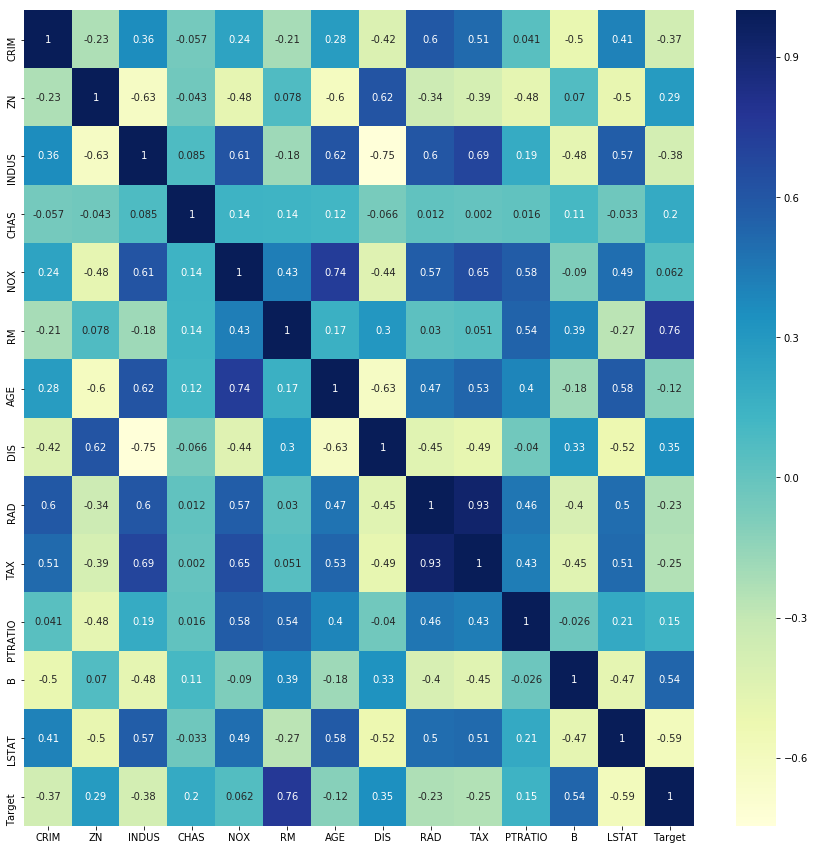

In [33]:
# Create each matrix
U_1 = e_vector_1_1
temp = np.diag(np.sqrt(non_zero_1_2))
S_1 = np.zeros_like(data_1).astype(np.float64)
S_1[:temp.shape[0],:temp.shape[1]] = temp
V_1 = e_vector_1_2.T

reconstructed_1 = dot(U_1,S_1).dot(V_1)
df_1 = pd.DataFrame(reconstructed_1,columns=boston.columns)
plt.figure(figsize=(15, 15))
sns.heatmap(df_1.corr(),annot=True,cmap="YlGnBu")

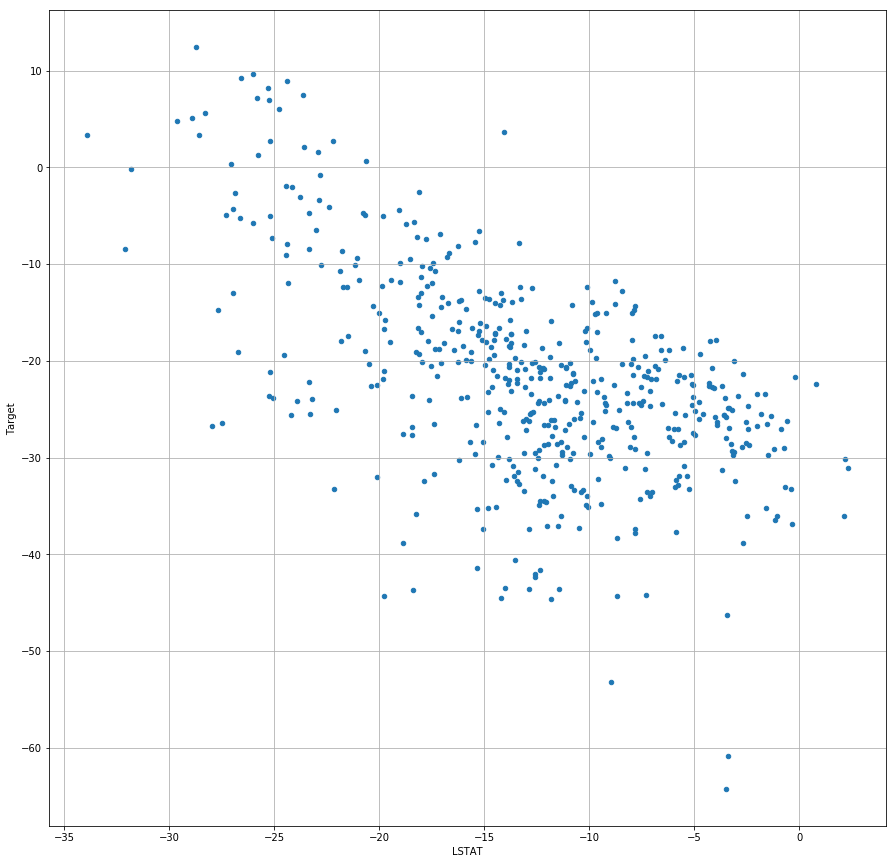

In [34]:
df_1.plot.scatter(x='LSTAT',y='Target',figsize=(15,15),grid=True)

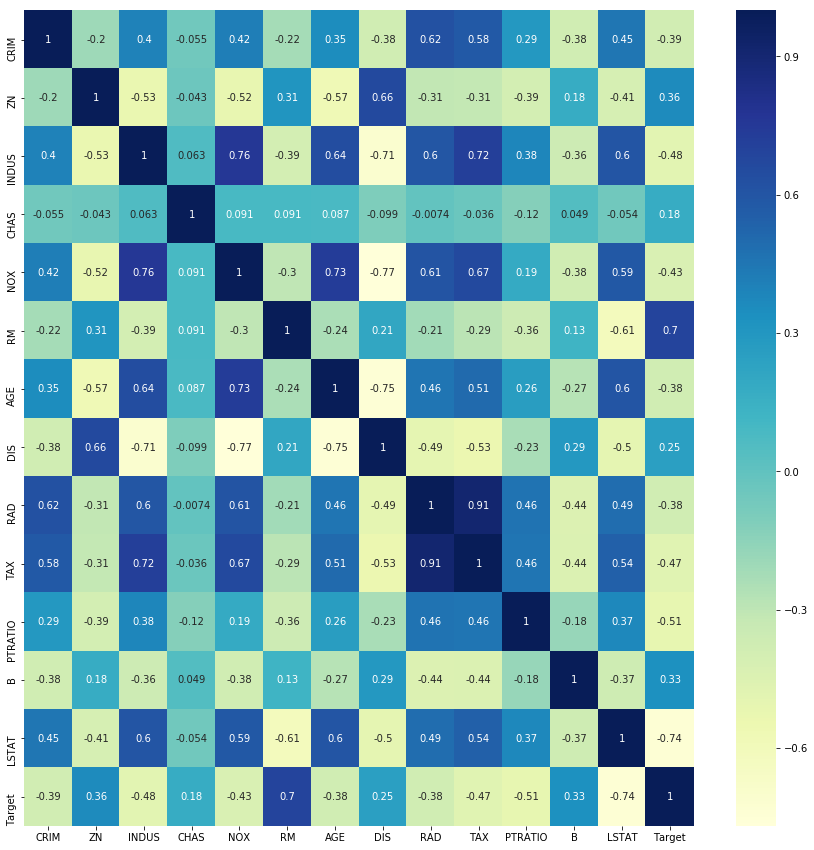

In [32]:
plt.figure(figsize=(15, 15))
sns.heatmap(boston.corr(),annot=True,cmap="YlGnBu")

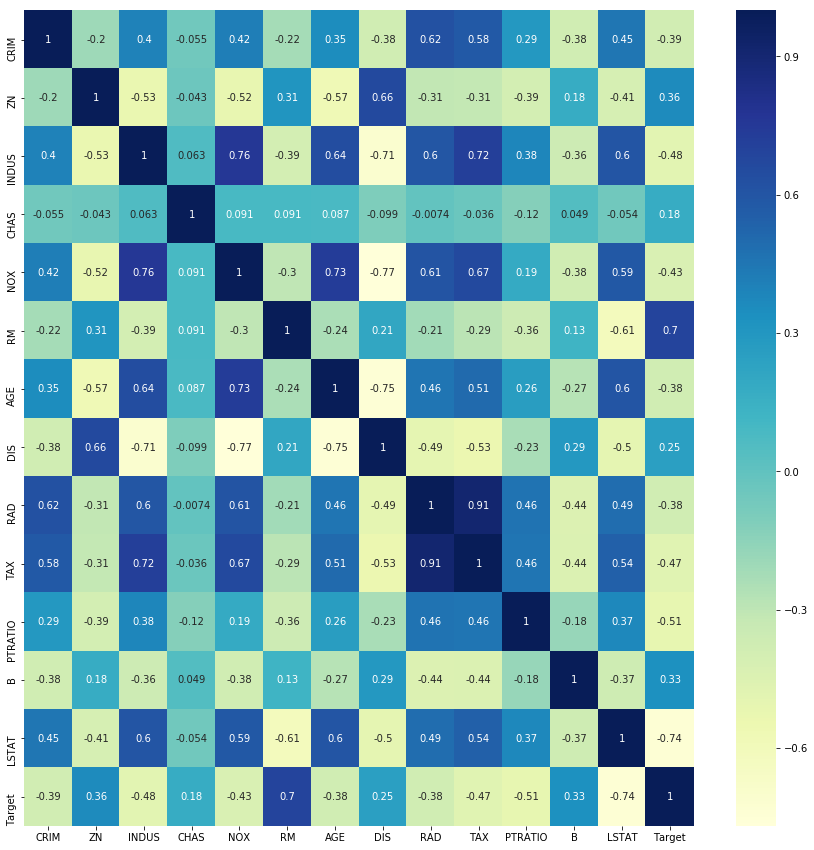

In [41]:
A = boston.values

temp = A.T.dot(A)
S,V = np.linalg.eig(temp)
S = np.diag(np.sqrt(S))

U = A.dot(V).dot(np.linalg.inv(S))
reconstructed_2 = U.dot(S).dot(V.T)
df_2 = pd.DataFrame(reconstructed_2,columns=boston.columns)
plt.figure(figsize=(15, 15))
sns.heatmap(df_2.corr(),annot=True,cmap="YlGnBu")